# Dataset description: Hotel booking demand
##### Goal: Find out what makes a hotel stand out, its price relations, where the demand comes from and explore relations between attributes. We will also implement some concepts and plots from the lectures
- hotel: resort or city hotel (type)

- is_canceled (target): Value indicating if the booking was canceled (1) or not (0)

- lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

- arrival_date_year: year of arrival date
- arrival_date_month: month of arrival date
- arrival_date_week: week # of year for arrival date
- arrival_date_day: day of arrival date

- stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

- adults: # of adults
- children: # of children
- babies: # of babies

- meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

- country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

- market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

- previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

- previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

- reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

- assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

- booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

- deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

- agent: ID of the travel agency that made the booking

- company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

- customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

- adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

- required_car_parking_spaces: Number of car parking spaces required by the customer

- total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

- reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

- reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Importing libraries & data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import statsmodels.api as sm
import pylab as py
import folium
from folium.plugins import HeatMap
import plotly.express as px

import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## First thoughts about the data
- #### adr will most likely have high correlation with night stays
- #### There may be anomalies to check for as rooms booked for no one

In [3]:
# Data descriptions (essential statistics)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##### Observation: Some variables may contain outliers and/or with high variance, for example lead_time

In [4]:
# View null counts and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data pre-processing
- ##### Tasks include:
    - ##### cleaning
    - ##### integration
    - ##### reduction
    - ##### transformation & discretization

## Data cleaning
#### In this section we handle data that is:
- #### Incomplete
- #### Noisy
- #### inconsistent
- #### Intentional

In [5]:
# Find out which columns have null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

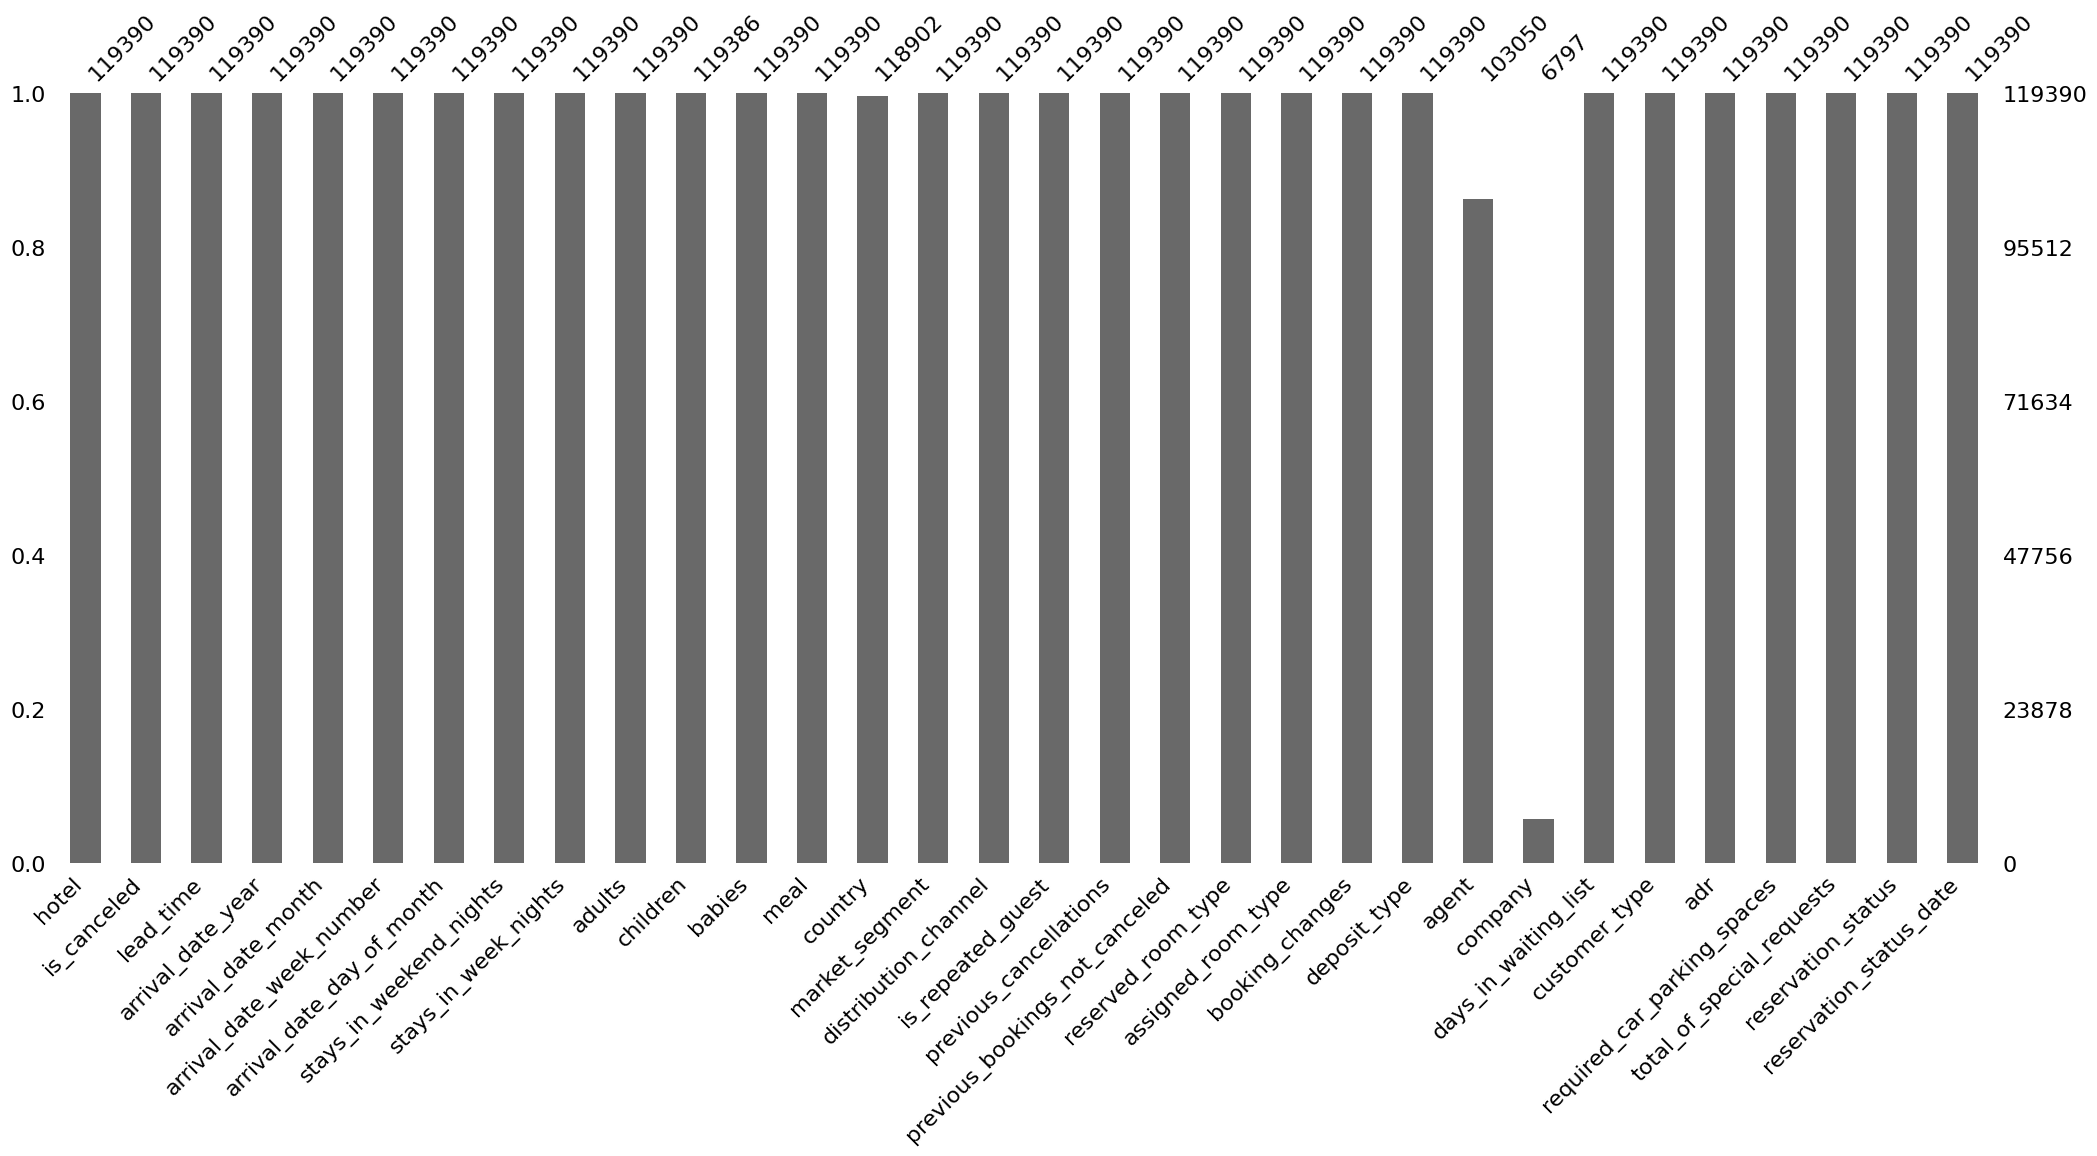

In [10]:
# Visualize missing data
msno.bar(df);

##### Children, country, agent & company have missing values

In [ ]:
# seeing percentage of NULL values among each feature
print('company:', 100*(df.company.isnull().sum()/len(df.company.index)))
print('agent:', 100*(df.agent.isnull().sum()/len(df.agent.index)))
print('country:', 100*(df.country.isnull().sum()/len(df.country.index)))
print('children:', 100*(df.children.isnull().sum()/len(df.children.index)))

company: 94.30689337465449
agent: 13.686238378423655
country: 0.40874445095904177
children: 0.003350364352123293


In [3]:
# dropping company column as they have high percentage of null values
df = df.drop(['company'],axis=1)

In [4]:
# Fill the rest of missing values with zeroes
# Why zeroes? filling with mean/median or inferring the values would not 
# make sense as our missing values are IDs, countries and 4 children
df.fillna(0, inplace=True)

In [5]:
# Check for incorrect data
invalid = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[invalid]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [6]:
# Drop illogical data
df = df[~invalid]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Noise handling techniques:
- #### Binning
- #### Regression
- #### Clustering
- #### Combined inspection

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


##### Handling date data type

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day
df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015,7,1
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015,7,1
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0.0,0,Transient,75.0,0,0,Check-Out,2015,7,2
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,304.0,0,Transient,75.0,0,0,Check-Out,2015,7,2
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,240.0,0,Transient,98.0,0,1,Check-Out,2015,7,3


#### Making only-categorical & only-numerical dataframes for easier inspection

In [8]:
categoircal = [col for col in df.columns if df[col].dtype == 'O']
categorical_df = df[categoircal]
categorical_df.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [ ]:
len(categorical_df.columns)

10

In [9]:
numerical_df = df.drop(columns=categoircal, axis=1)
numerical_df.drop('is_canceled', inplace=True, axis=1)
numerical_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,342,2015,27,1,0,0,2,0.0,0,0,...,0,3,0.0,0,0.00,0,0,2015,7,1
1,737,2015,27,1,0,0,2,0.0,0,0,...,0,4,0.0,0,0.00,0,0,2015,7,1
2,7,2015,27,1,0,1,1,0.0,0,0,...,0,0,0.0,0,75.00,0,0,2015,7,2
3,13,2015,27,1,0,1,1,0.0,0,0,...,0,0,304.0,0,75.00,0,0,2015,7,2
4,14,2015,27,1,0,2,2,0.0,0,0,...,0,0,240.0,0,98.00,0,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,...,0,0,394.0,0,96.14,0,0,2017,9,6
119386,102,2017,35,31,2,5,3,0.0,0,0,...,0,0,9.0,0,225.43,0,2,2017,9,7
119387,34,2017,35,31,2,5,2,0.0,0,0,...,0,0,9.0,0,157.71,0,4,2017,9,7
119388,109,2017,35,31,2,5,2,0.0,0,0,...,0,0,89.0,0,104.40,0,0,2017,9,7


In [ ]:
len(numerical_df.columns)

21

### Let's look at numerical data

In [ ]:
# Check variance
numerical_df.var()

lead_time                         11422.361808
arrival_date_year                     0.500535
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
booking_changes                       0.407688
agent                             11485.169679
days_in_waiting_list                309.689671
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
year                                  0.511662
month                                11.194498
day                                  77.068582
dtype: float6

* High variance in some attributes was observed

In [ ]:
# Obtaining standard deviations to check the extent of the data variance
numerical_df.std()

lead_time                         106.875450
arrival_date_year                   0.707485
arrival_date_week_number           13.601107
arrival_date_day_of_month           8.781070
stays_in_weekend_nights             0.995117
stays_in_week_nights                1.897106
adults                              0.575186
children                            0.398836
babies                              0.097509
is_repeated_guest                   0.174663
previous_cancellations              0.844918
previous_bookings_not_canceled      1.498137
booking_changes                     0.638504
agent                             107.168884
days_in_waiting_list               17.598002
adr                                50.434007
required_car_parking_spaces         0.245360
total_of_special_requests           0.792876
year                                0.715306
month                               3.345818
day                                 8.778871
dtype: float64

* Some attributes have extremely high standard deviation

#### Extracting high variance data and visualize it using histograms
#### The Sturges Formula
$$ K=1+3.322\log_2{N} $$
#### Determines the number of classes (k) in a frequency distribution with total frequency N

In [18]:
def sturges(data):
    
    data = np.asarray(data, dtype=np.float_)
    N = data.size
    k = int(3.322 * math.log2(N) + 1) + 1

    return k

#### Using sturges to get the optimal number of bins to use to visualize values in histogram

In [19]:
best_bins = sturges(numerical_df)

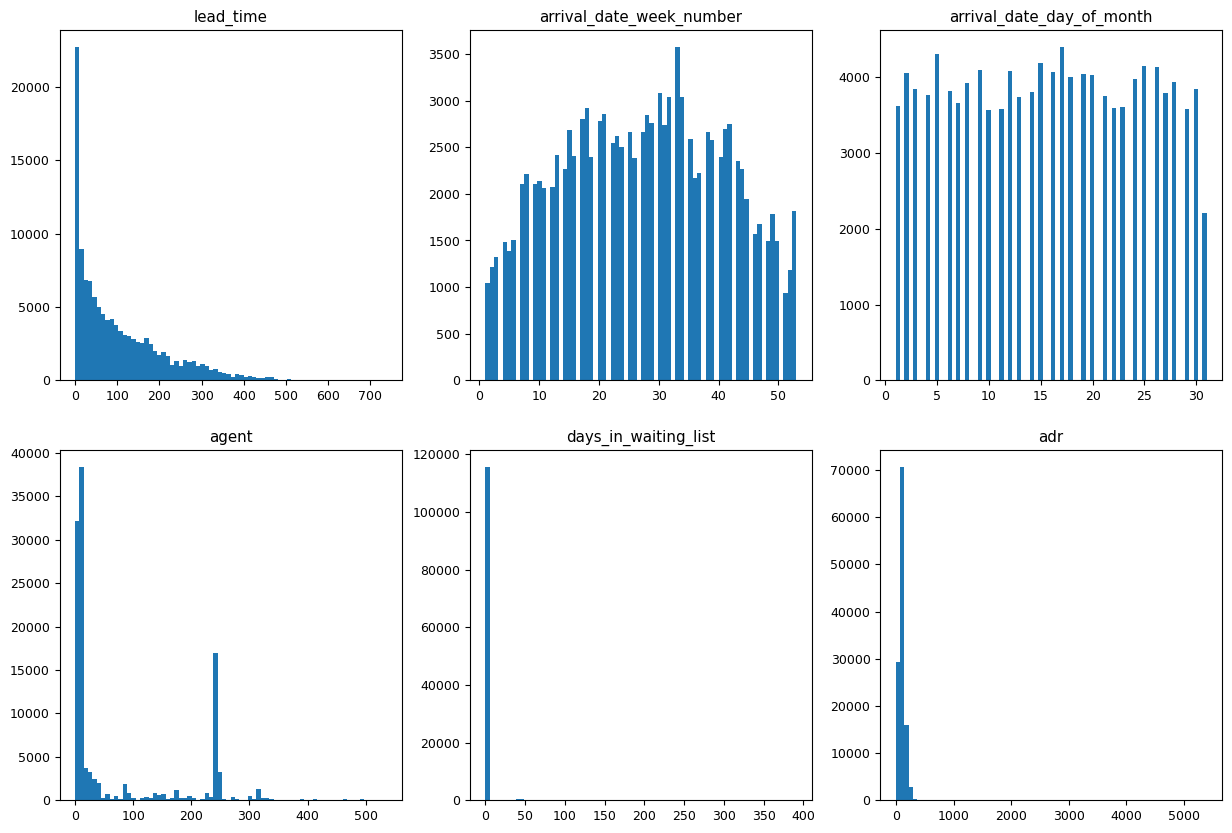

In [20]:
# adding high variance attributes in a list (filtered by standard deviation value > 3)
att = [];
for col in numerical_df:
    c = numerical_df[col]
    if c.std() > 3:
        att.append(col)

#plotting graphs
plt.rcParams.update({'font.size': 9})
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    ax.hist(df[att[i]], best_bins)
    ax.set_title(att[i])
plt.show()

### Normalization

In [ ]:
# Normalize numerical data
# methods include: z-score, min-max, or decimal-scaling
# We chose z-score
for col in numerical_df:
    numerical_df[col] = (numerical_df[col] - numerical_df[col].mean()) / numerical_df[col].std()

### Implement changes to the dataset

In [10]:
numerics = ['int64', 'float64']
categories = ['object']
numeral_cols = df.select_dtypes(include=numerics).drop('is_canceled', axis=1).columns
categorical_cols = df.select_dtypes(include=categories).columns
df[numeral_cols] = numerical_df
df[categorical_cols] = categorical_df
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0.0,0,Transient,0.00,0,0,Check-Out,2015,7,1
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0.0,0,Transient,0.00,0,0,Check-Out,2015,7,1
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0.0,0,Transient,75.00,0,0,Check-Out,2015,7,2
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,304.0,0,Transient,75.00,0,0,Check-Out,2015,7,2
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,240.0,0,Transient,98.00,0,1,Check-Out,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,35,30,2,5,2,0.0,...,394.0,0,Transient,96.14,0,0,Check-Out,2017,9,6
119386,City Hotel,0,102,2017,35,31,2,5,3,0.0,...,9.0,0,Transient,225.43,0,2,Check-Out,2017,9,7
119387,City Hotel,0,34,2017,35,31,2,5,2,0.0,...,9.0,0,Transient,157.71,0,4,Check-Out,2017,9,7
119388,City Hotel,0,109,2017,35,31,2,5,2,0.0,...,89.0,0,Transient,104.40,0,0,Check-Out,2017,9,7


# Exploratory Data Analysis (EDA)

### Univariate analysis

#### Quantile-Quantile (QQ) plot
Testing closeness of a variable's distribution to the normal distribution

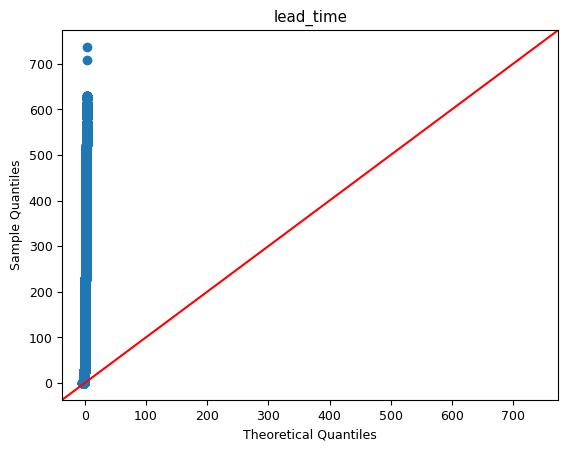

In [537]:
sm.qqplot(df.lead_time, line ='45')
plt.title("lead_time")
py.show()

This looks far from normal

#### Bar-plots

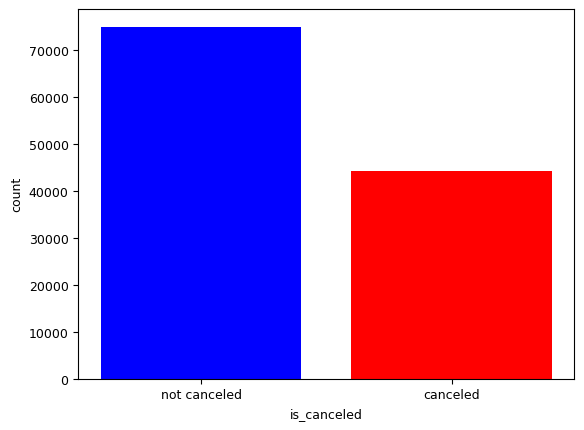

In [455]:
# Cancelled vs Not cancelled
x = df.is_canceled.value_counts(sort=False).index
y = df.is_canceled.value_counts(sort=False)
plt.bar(x, y, color=['blue','red'])
plt.xticks([0,1], ['not canceled','canceled'])
plt.xlabel('is_canceled')
plt.ylabel('count')
plt.show()

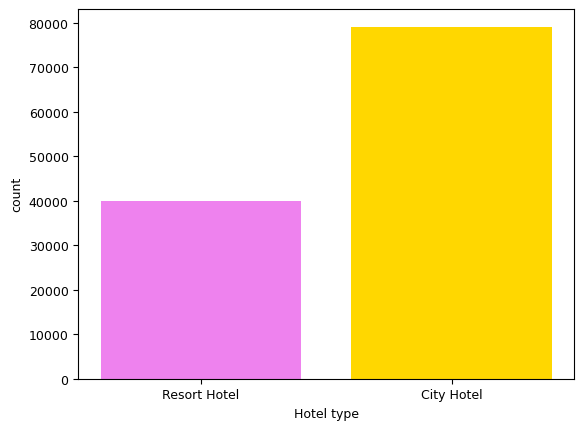

In [458]:
# Hotel types
x = df.hotel.value_counts(sort=False).index
y = df.hotel.value_counts(sort=False)
plt.bar(x, y, color=['violet','gold'])
plt.xticks([0,1], ['Resort Hotel', 'City Hotel'])
plt.xlabel('Hotel type')
plt.ylabel('count')
plt.show()

### Box-plot
Very useful for seeing the data's distribution and the outliers

![Alt text](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots_0.jpg)

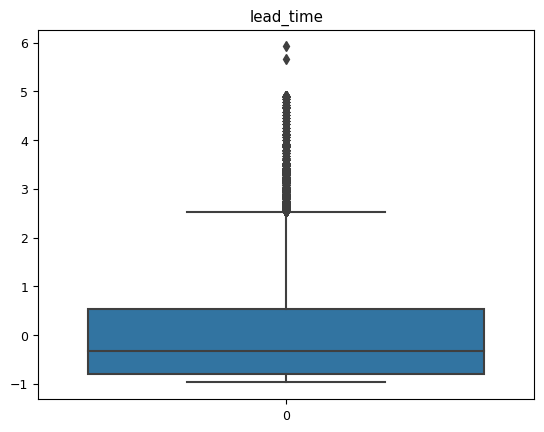

In [414]:
sns.boxplot(df.lead_time);
plt.title("lead_time");

There are lots of outliers which explains the variable's QQ-plot

### Bivariate analysis

#### Q: From where do most guests come?

We really liked this plot and apparently it does make use of the country column's format!

In [448]:
country_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests.columns = ['country', 'No of guests']
base_map = folium.Map()
guests_map = px.choropleth(country_guests, color = country_guests['No of guests'], locations = country_guests['country'], hover_name = country_guests['country'])
guests_map.show()

People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

#### Boxplot distributions of nights spent at hotels by hotel type and market segment

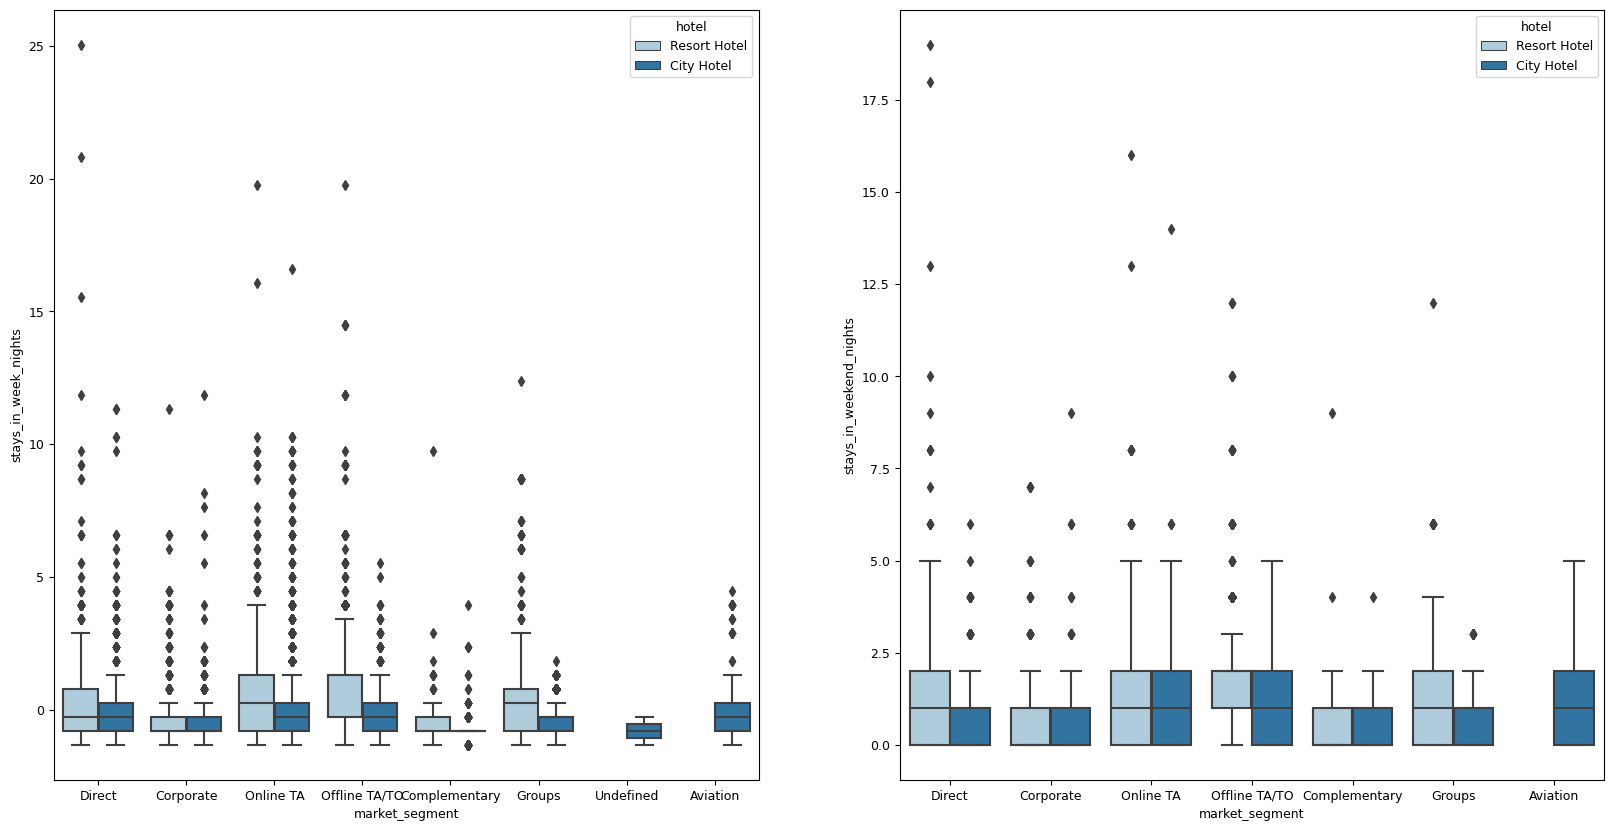

In [444]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = df, hue = "hotel", palette = "Paired", ax=ax[0]);
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = data, hue = "hotel", palette = 'Paired', ax=ax[1]);

##### Observations:
- ##### Aviation segment don't seem to stay at resort hotels.
- ##### The majority of people prefer to stay less than a week
- ##### However, it looks normal staying in resort hotels for 12 to 13 days according to the segments. Staying longer than 15 days makes the outliers.
- ##### Resort hotels are more preferred over city hotels.
- ##### Most groups are normally-distributed, with some having high skewness

#### Q: How much do guests pay per night?
- Prices vary according to different meal arrangements & room types, in addition to the season.

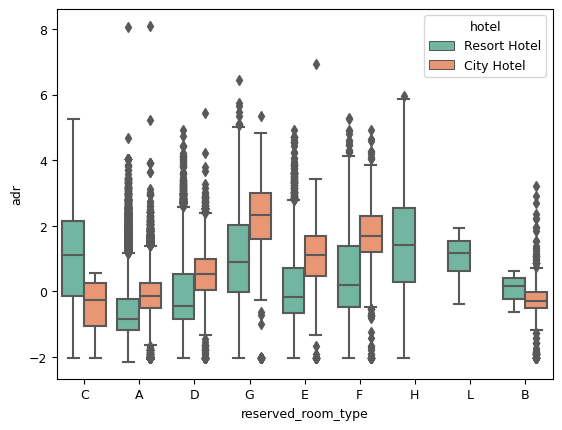

In [431]:
sns.boxplot(data=df[df['is_canceled'] == 0], x = 'reserved_room_type', y = 'adr', hue='hotel', palette='Set2');

#### Observation: the average room price depends on its type.

#### Q: How many times did repeated guests cancel their booking?

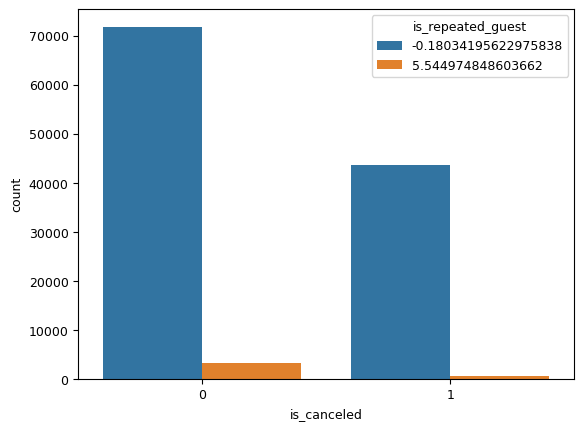

In [380]:
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df);

In [347]:
df.is_canceled.value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

##### As expected, repeated guests would not be cancelling their reservations except for some cases.

### Multi-variate analysis

### Correlation analysis using heatmap

C:\Users\ASUS\AppData\Local\Temp\ipykernel_39060\3601567006.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



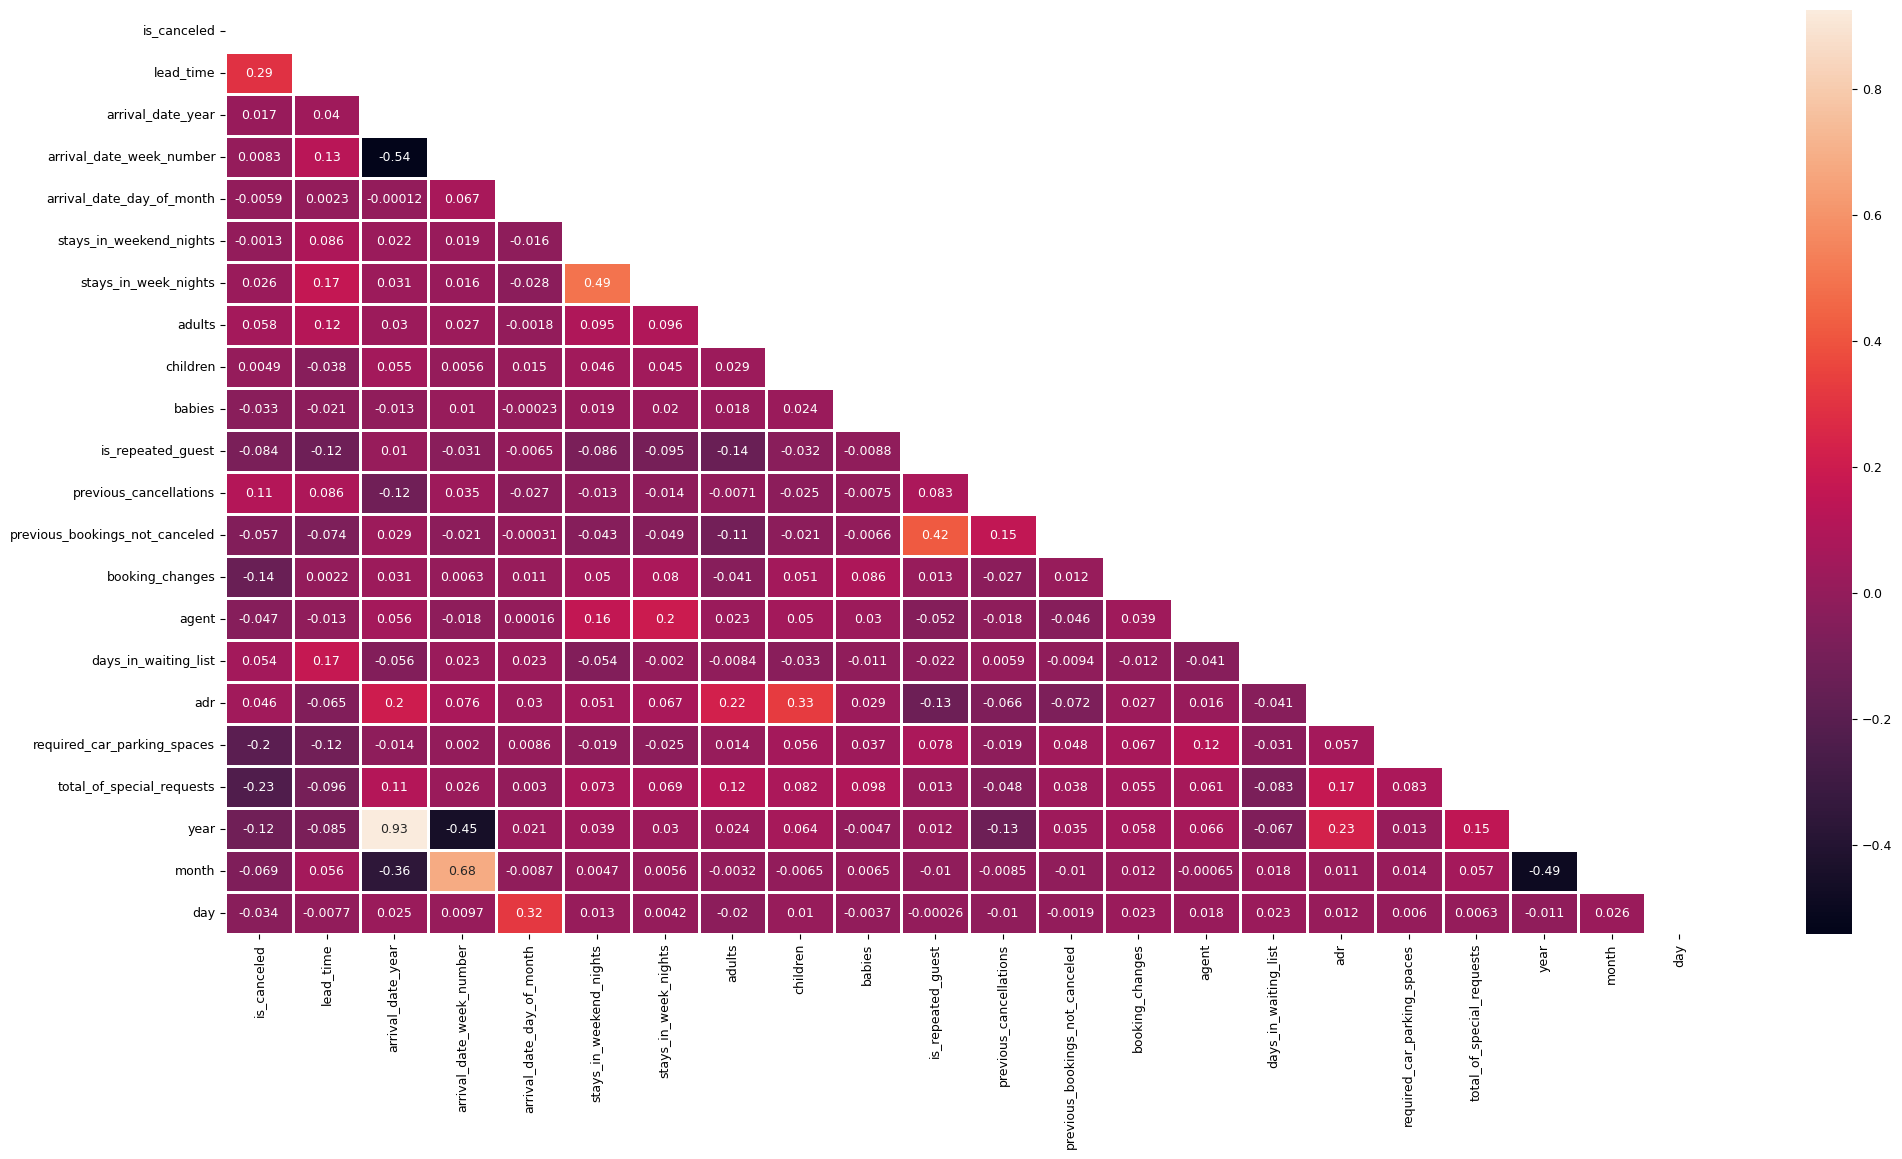

In [450]:
plt.figure(figsize = (24, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=1, mask=np.triu(np.ones_like(corr)))
plt.show();

##### Observations:
- ##### Children are the most affecting factor on average daily rate
- ##### Previous uncancelled bookings has high correlation with is repeated guest, making sense as explained before
- ##### lead_time is the most important attribute for prediction
- ##### year-Month-day correlations correspond to seasonal factors 

#### Highlighting on the most important variables for prediction

In [382]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_39060\599440065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)


is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
year                              0.117119
previous_cancellations            0.110139
is_repeated_guest                 0.083745
month                             0.068550
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
day                               0.034046
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

# Machine Learning

### Let us perform suitable encoding for each variable

### Encoding categorical data

In [11]:
# printing unique values of each column
for col in categorical_df.columns:
    if col.startswith('country'):
        continue
    print(f"{col}: \n{categorical_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

assigned_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

reservation_status: 
['Check-Out' 'Canceled' 'No-Show']



In [12]:
df['hotel'] = df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
df['meal'] =df['meal'].map({'BB' : 4, 'FB': 3, 'HB': 2, 'SC': 1, 'Undefined': 0})
df['market_segment'] =df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
df['distribution_channel'] =df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
df['reserved_room_type'] =df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8})
df['assigned_room_type'] = df['assigned_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8, 'I':9, 'K':10})
le = LabelEncoder()
df.country = df.country.map(str)
df['country'] = le.fit_transform(df.country)
df['deposit_type'] =df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
df['customer_type'] =df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
df['year'] =df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

### Splitting data

In [13]:
X = df.drop('is_canceled' , axis=1)
X = X.drop('reservation_status', axis=1)
y = df.is_canceled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Tuned models

#### Logistic Regression

In [678]:
lr = LogisticRegression(C=0.3, max_iter=10000).fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8115091015854374
Confusion Matrix:
 [[21132  1480]
 [ 5261  7890]]


#### Decision Tree

In [25]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=32).fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"Accuracy:", accuracy_score(y_test, y_pred))
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9460056482957246
Confusion Matrix:
 [[21561   945]
 [  986 12271]]


### Decision Tree performed better